Random Forest R^2 Score: 0.7984975397377947
Random Forest RMSE: 7844.546651968625
XGBoost R^2 Score: 0.8187238321433787
XGBoost RMSE: 7440.429901894587


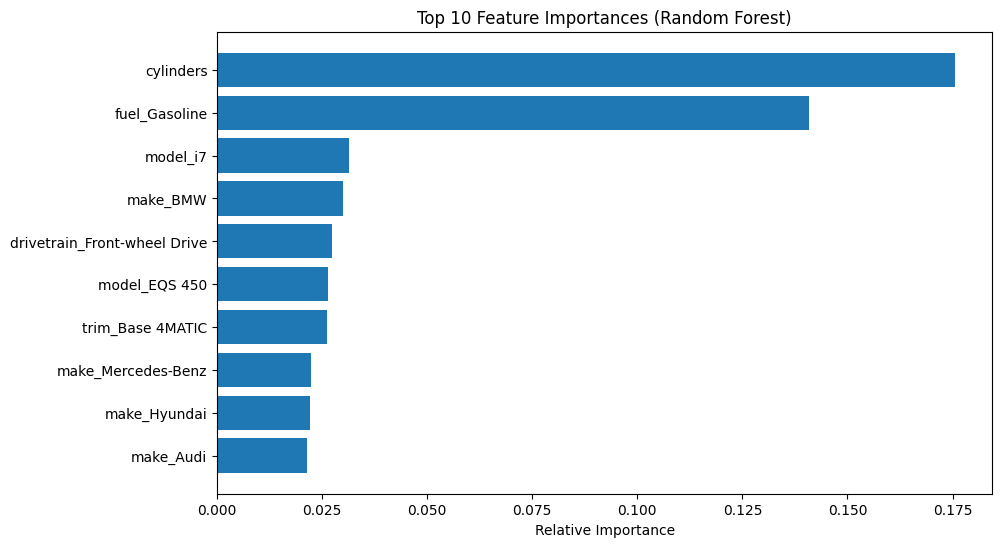

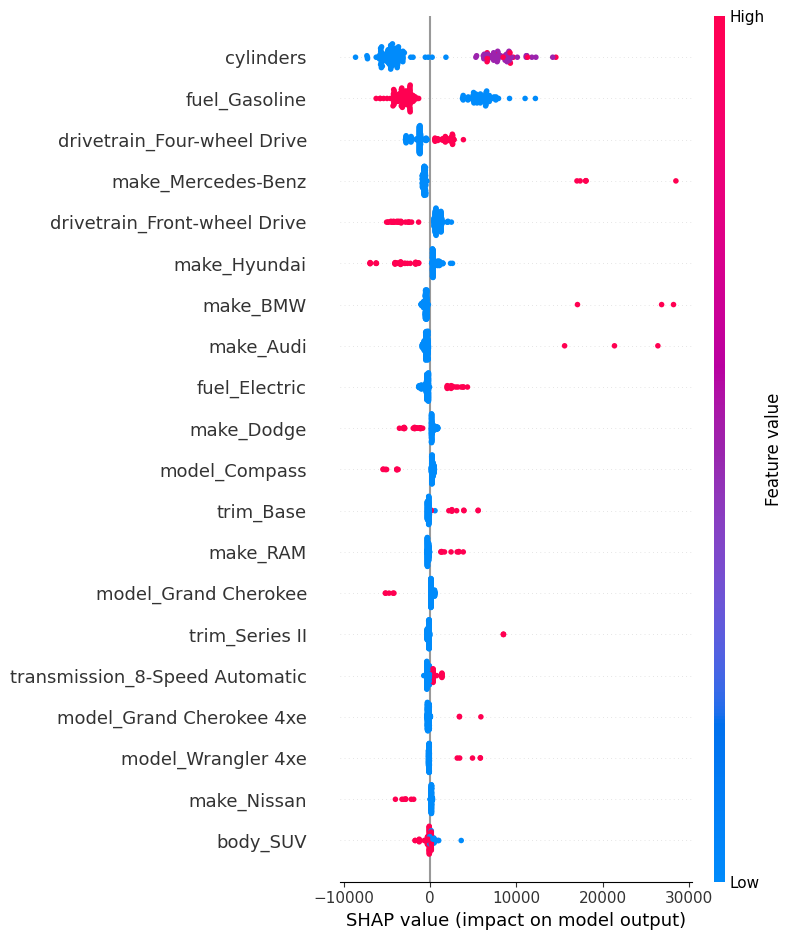

['vehicle_price_predictor_xgb.pkl']

In [ ]:
# Step 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error
import joblib
import xgboost as xgb
import shap
import re

# Step 2: Load Dataset
df = pd.read_csv(r"/content/drive/MyDrive/vechil_price_pred/dataset.csv")

# Step 3: Drop Unused Text Columns
df = df.drop(columns=['name', 'description', 'engine'])

# Step 4: Drop rows where target 'price' is missing
df = df[df['price'].notna()].copy() # Add .copy() here to avoid SettingWithCopyWarning

# Step 5: Fill Missing Values
df.loc[:, 'cylinders'] = df['cylinders'].fillna(df['cylinders'].median())
df.loc[:, 'mileage'] = df['mileage'].fillna(df['mileage'].median())
df.loc[:, 'doors'] = df['doors'].fillna(df['doors'].mode()[0])

cat_cols = ['fuel', 'transmission', 'trim', 'body', 'exterior_color', 'interior_color']
for col in cat_cols:
    df.loc[:, col] = df[col].fillna(df[col].mode()[0])

# Step 6: One-Hot Encoding
df = pd.get_dummies(df, columns=['make', 'model', 'fuel', 'transmission', 'trim',
                                 'body', 'exterior_color', 'interior_color', 'drivetrain'],
                    drop_first=True)

# Step 7: Feature/Target Split
X = df.drop(columns='price')
y = df['price']

# Step 8: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Model Training (Random Forest)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 10: Random Forest Evaluation
y_pred_rf = rf_model.predict(X_test)
print("Random Forest R^2 Score:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", root_mean_squared_error(y_test, y_pred_rf))

# Step 11: Model Training (XGBoost)
# Clean feature names for XGBoost
X_train.columns = [re.sub(r'\[|\]|<', '', col) for col in X_train.columns]
X_test.columns = [re.sub(r'\[|\]|<', '', col) for col in X_test.columns]
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Step 12: XGBoost Evaluation
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost R^2 Score:", r2_score(y_test, y_pred_xgb))
print("XGBoost RMSE:", root_mean_squared_error(y_test, y_pred_xgb))

# Step 13: Feature Importance from Random Forest
importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances (Random Forest)")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Step 14: SHAP Explainability for XGBoost
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

# Step 15: Save Models
joblib.dump(rf_model, "vehicle_price_predictor_rf.pkl")
joblib.dump(xgb_model, "vehicle_price_predictor_xgb.pkl")

In [ ]:
import joblib

model = joblib.load("vehicle_price_predictor_xgb.pkl")
predictions = model.predict(new_data)

NameError: name 'new_data' is not defined